## DESCRIPTION OF DATASET

* Contains transactions made by credit cards in September 2013 by european cardholders. 
* Presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
* Highly unbalanced, the positive class (frauds) account for 0.172 % of all transactions.
* It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
* Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
* Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
* The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
* Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data = data.drop(['Time', 'Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [4]:
x = data.drop(['Class'], axis=1)
y = data['Class']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.metrics import confusion_matrix

def generateClassificationReport(y_test,y_pred):
    print('Precision is=',precision_score(y_test,y_pred,average='binary')) 
    print('Recall is=',recall_score(y_test,y_pred,average='binary'))    
    print('accuracy is=',accuracy_score(y_test,y_pred))

## Naive Bayes Classifier

In [7]:
from sklearn.naive_bayes import GaussianNB 

classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

Precision is= 0.06661502711076685
Recall is= 0.8514851485148515
accuracy is= 0.9785822127032057


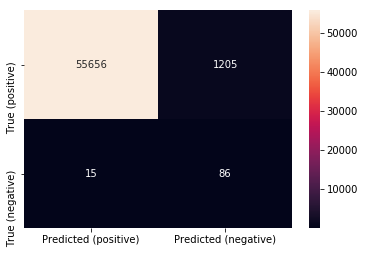

In [8]:
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test,y_pred)

df_cm3 = pd.DataFrame(cm3, index = ['True (positive)', 'True (negative)'])
df_cm3.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm3, annot=True, fmt="d")

generateClassificationReport(y_test,y_pred)

## Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

Precision is= 0.8058252427184466
Recall is= 0.8217821782178217
accuracy is= 0.9993328885923949


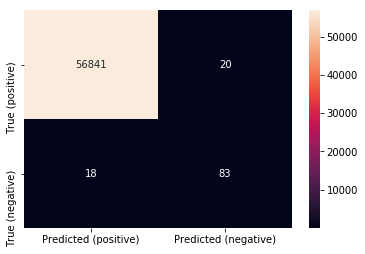

In [10]:
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test,y_pred)

df_cm3 = pd.DataFrame(cm3, index = ['True (positive)', 'True (negative)'])
df_cm3.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm3, annot=True, fmt="d")

generateClassificationReport(y_test,y_pred)